The libraries being used

In [1]:
import ulmo
import rasterio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (9, 9)
import scipy.misc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

Setting a bounding box for part of the Grand Canyon

In [2]:
Grand_Canyon_box = [-113.48252534866334, # min long
                    35.68462925606809,   # min lat
                    -113.26554536819458, # max long
                    35.82338084770654]  # max lat

Defining a helper function to retrieve the DEMs of specified resolution values

In [3]:
def import_first_DEM(arcsecond_value):
    index = 0
    download = ulmo.usgs.ned.get_raster(layer = arcsecond_value,
                                        bbox = Grand_Canyon_box)
    fi = download['features'][index]['properties']['file']
    with rasterio.open(fi, 'r') as src:
        DEM = src.read()
    return(DEM)

## 30m resolution

Importing the ~30m data, notice it shape is approximately 1/3 of the next DEM

In [4]:
DEM = import_first_DEM('1 arc-second')
DEM.squeeze().shape

retrieving raster availability from https://www.sciencebase.gov/catalog/items?parentId=4f70aa71e4b058caae3f8de1&filter=tags%3DIMG&max=1000&fields=webLinks%2Cspatial%2Ctitle&format=json&filter=spatialQuery%3D%7Bwkt%3A%22POLYGON+%28%28-113.48252534866334+35.82338084770654%2C-113.48252534866334+35.68462925606809%2C-113.26554536819458+35.68462925606809%2C-113.26554536819458+35.82338084770654%2C-113.48252534866334+35.82338084770654%29%29%22%2Crelation%3A%22intersects%22%7D
... downloading tile 1 of 1 from https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/IMG/n36w114.zip
... ... zipfile saved at /home/jeremydiaz/.local/share/ulmo/usgs/ned/4f70aa71e4b058caae3f8de1/zip/n36w114.zip
... ... .img format raster saved at /home/jeremydiaz/.local/share/ulmo/usgs/ned/4f70aa71e4b058caae3f8de1/n36w114.img


(3612, 3612)

Making this the same number of pixels as the finer resolution data and viewing it; notice the apparent contour lines due to coarse spatial resolution

/home/jeremydiaz/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/home/jeremydiaz/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


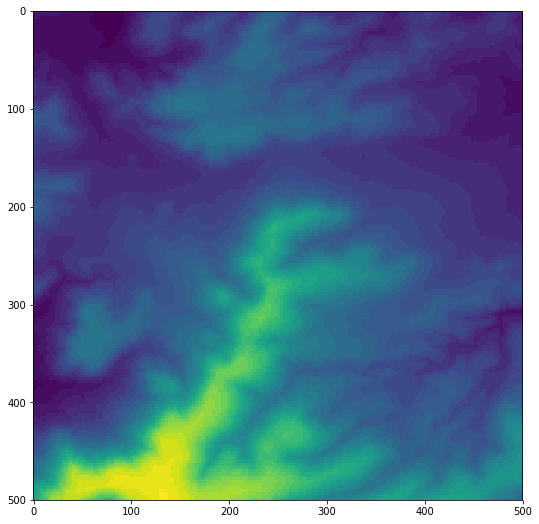

In [5]:
DEM_coarse = scipy.misc.imresize(DEM.squeeze(), (10821, 10821))
DEM_coarse.shape

plt.imshow(DEM_coarse.squeeze()[500:1000, 1000:1500])

## 10m resolution

In [6]:
DEM = import_first_DEM('1/3 arc-second')
DEM.squeeze().shape

retrieving raster availability from https://www.sciencebase.gov/catalog/items?parentId=4f70aa9fe4b058caae3f8de5&filter=tags%3DIMG&max=1000&fields=webLinks%2Cspatial%2Ctitle&format=json&filter=spatialQuery%3D%7Bwkt%3A%22POLYGON+%28%28-113.48252534866334+35.82338084770654%2C-113.48252534866334+35.68462925606809%2C-113.26554536819458+35.68462925606809%2C-113.26554536819458+35.82338084770654%2C-113.48252534866334+35.82338084770654%29%29%22%2Crelation%3A%22intersects%22%7D
... downloading tile 1 of 1 from https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/IMG/n36w114.zip
... ... zipfile saved at /home/jeremydiaz/.local/share/ulmo/usgs/ned/4f70aa9fe4b058caae3f8de5/zip/n36w114.zip
... ... .img format raster saved at /home/jeremydiaz/.local/share/ulmo/usgs/ned/4f70aa9fe4b058caae3f8de5/n36w114.img


(10812, 10812)

Note how much smoother (i.e. less contour-y) this is 

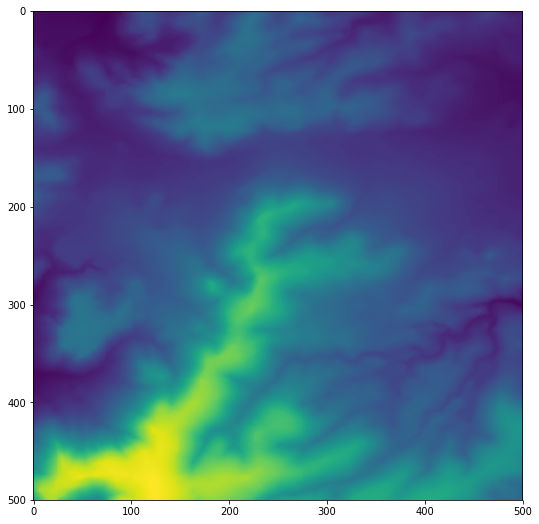

In [7]:
plt.imshow(DEM.squeeze()[500:1000, 1000:1500])

## 3D plot of 10m resolution

Preparing the data for 3d input

In [8]:
empty_list = []
for i in range(500):
    empty_list.extend(np.repeat(i, 500))
x = empty_list
x = np.asarray(x)
x = x.reshape((500, 500))
y = list(np.arange(500)) * 500
y = np.asarray(y)
y = y.reshape((500, 500))
y = np.fliplr(y)
z = DEM.squeeze()[500:1000, 1000:1500]

The plot code

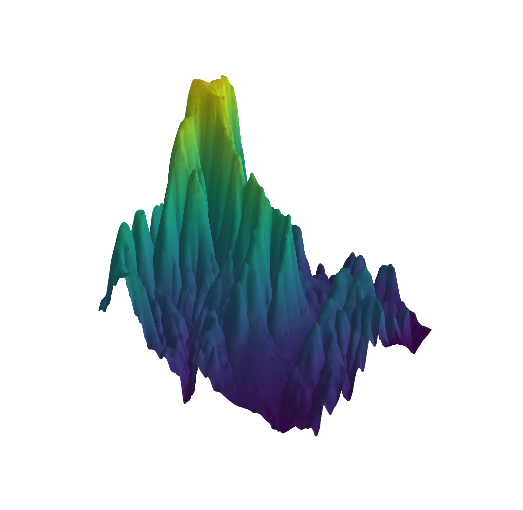

In [9]:
Z = (z - z.min()) / (z.max() - z.min())

colors = cm.viridis(Z)
rcount, ccount, _ = colors.shape


fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(np.flipud(x), y, z, rcount=500,  ccount=500,
                       facecolors=colors, shade=True)
surf.set_facecolor((0,0,0,0))
plt.axis('off')
plt.show()